In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['xtick.minor.size'] = 3.5
mpl.rcParams['ytick.minor.size'] = 3.5
mpl.rcParams['xtick.major.width'] = 1.1
mpl.rcParams['ytick.major.width'] = 1.1
mpl.rcParams['xtick.minor.width'] = .8
mpl.rcParams['ytick.minor.width'] = .8
mpl.rcParams['legend.fontsize'] = 14
#xtick.major.size     : 3.5      # major tick size in points
#xtick.minor.size     : 2      # minor tick size in points
#xtick.major.width    : 0.8    # major tick width in points
#xtick.minor.width    : 0.6    # minor tick width in points
%matplotlib inline

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import sys
sys.path.insert(1, os.path.join(sys.path[0], '../../py_dshark'))

In [3]:
import py_dshark

In [86]:
print(py_dshark.solver.solve_disp.__doc__)

krange,solution = solve_disp(theta_in,delta_in,q_in,mu_in,dens_in,beta_para_in,beta_perp_in,kappa_in,drift_in,omega_r_in,omega_i_in,increment_r,increment_i,kstart,kend,nk,[nspecies_in,rf_error_in,eps_error_in])

Wrapper for ``solve_disp``.

Parameters
----------
theta_in : input float
delta_in : input float
q_in : input rank-1 array('d') with bounds (nspecies_in)
mu_in : input rank-1 array('d') with bounds (nspecies_in)
dens_in : input rank-1 array('d') with bounds (nspecies_in)
beta_para_in : input rank-1 array('d') with bounds (nspecies_in)
beta_perp_in : input rank-1 array('d') with bounds (nspecies_in)
kappa_in : input rank-1 array('d') with bounds (nspecies_in)
drift_in : input rank-1 array('d') with bounds (nspecies_in)
omega_r_in : input float
omega_i_in : input float
increment_r : input float
increment_i : input float
kstart : input float
kend : input float
nk : input int

Other Parameters
----------------
nspecies_in : input int, optional
    Default: len(q_in)
rf_error_in : i

In [76]:
p = {}
p['nspecies'] = 3
p['q_in'] = np.array([1., -1., -1.])
p['mu_in'] = np.array([1., 1836., 1836.])
p['dens_in'] = np.array([1., .95, .05])
vdc_va = 3.
p['drift_in'] = np.array([0., vdc_va, -p['dens_in'][1]/p['dens_in'][2]* vdc_va])
t_in = np.array([1, 2, 12])
beta_0 = .25
p['beta_para_in'] = beta_0 * t_in * p['dens_in']
p['beta_perp_in'] = beta_0 * t_in * p['dens_in']
p['kappa_in'] = np.array([50, 50, 8])
p['delta_in'] = 1e-4 # v_A/c

p['increment_r'] = 0
p['increment_i'] = 0
p['rf_error_in'] = 1e-3
p['eps_error_in'] = 1e-3

In [77]:
kstart = .2
kend = 5.
nk = 60
theta = 80.
omega_r = kstart * np.cos(np.deg2rad(theta) * (1 + p['drift_in'][0]))
omega_i = 0.

In [78]:
krange, disp = py_dshark.solver.solve_disp(
    nspecies_in = p['nspecies'],
    q_in=p['q_in'],
    mu_in=p['mu_in'],
    dens_in=p['dens_in'],
    drift_in=p['drift_in'],
    beta_para_in=p['beta_para_in'],
    beta_perp_in=p['beta_perp_in'],
    kappa_in=p['kappa_in'],
    delta_in=p['delta_in'],
    rf_error_in=p['rf_error_in'],
    eps_error_in=p['eps_error_in'],
    
    increment_r=p['increment_r'],
    increment_i=p['increment_i'],

    kstart=kstart,
    kend=kend,
    nk=nk,
    theta_in=theta,
    omega_r_in=omega_r,
    omega_i_in=omega_i
)

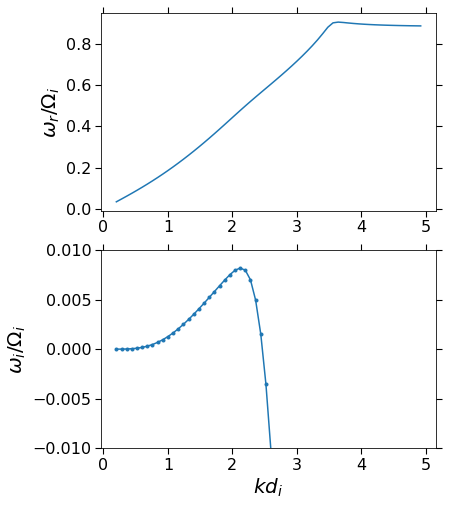

In [82]:
plt.figure(figsize=[6, 8])

plt.subplot(211)
plt.plot(krange, np.array(disp).real)
plt.ylabel(r'$\omega_r/\Omega_i$')

plt.subplot(212)
plt.plot(krange, np.array(disp).imag, '.-')
plt.ylim([-0.01, 0.01])
plt.xlabel(r'$kd_i$')
plt.ylabel(r'$\omega_i/\Omega_i$')
plt.show()